In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal=sns.color_palette()
plt.style.use('fivethirtyeight')

In [3]:
df=pd.read_csv(r'/kaggle/input/time-series-forecasting-with-machine-learning-yt/AEP_hourly.csv')
df=df.set_index('Datetime')
df.index=pd.to_datetime(df.index)

In [4]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [5]:
df.tail(9)

,AEP_MW
Datetime,
2018-01-01 16:00:00,18691.0
2018-01-01 17:00:00,19109.0
2018-01-01 18:00:00,20279.0
2018-01-01 19:00:00,20925.0
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0
2018-01-01 23:00:00,20415.0
2018-01-02 00:00:00,19993.0


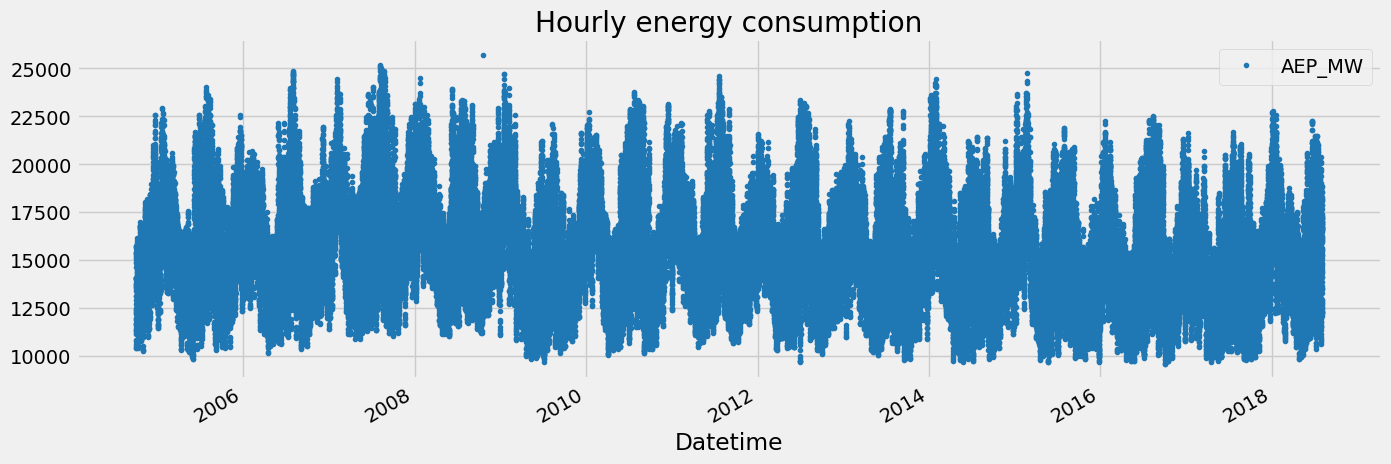

In [6]:
df.plot(style='.', figsize=(15,5), color=color_pal[0], title='Hourly energy consumption')
plt.show()

In [7]:
#train test split
train=df.loc[df.index < '01-01-2015']
test=df.loc[df.index > '01-01-2015']



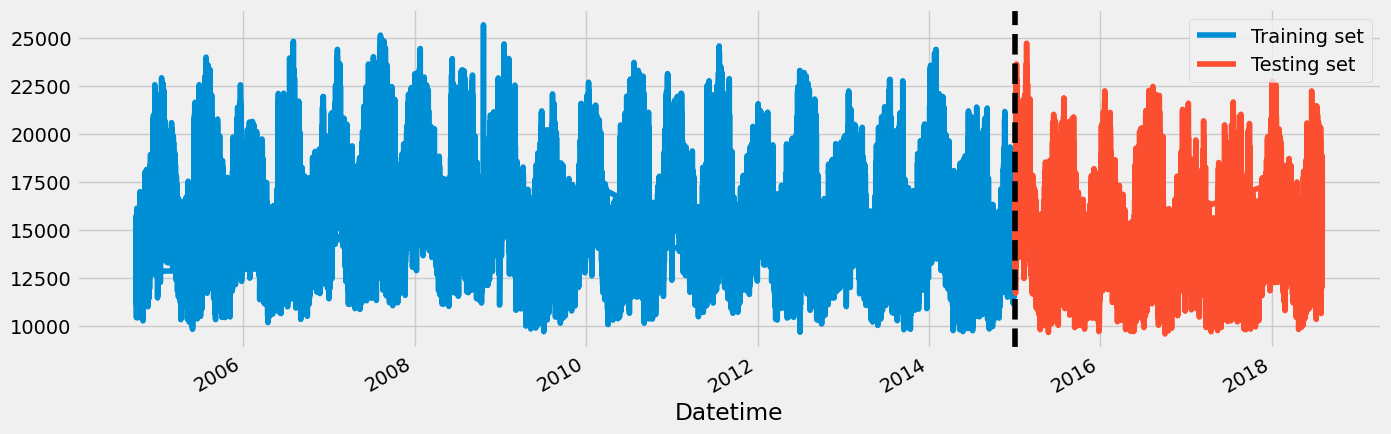

In [8]:
fig, ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training set')
test.plot(ax=ax, label='Test set' )
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training set', 'Testing set'])
plt.show()

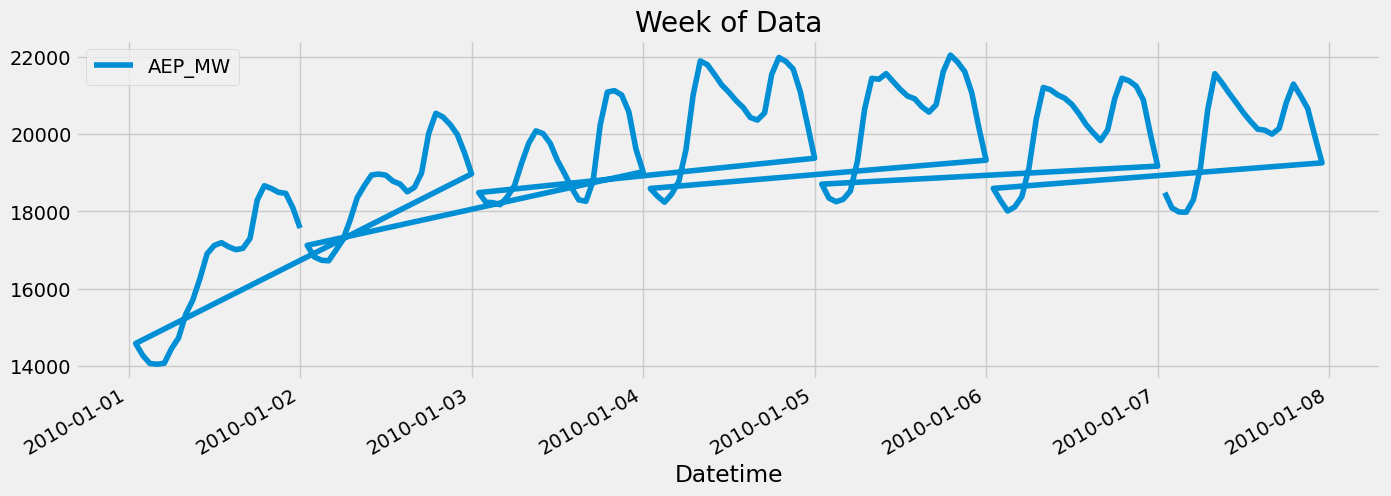

In [9]:
df.loc[(df.index >'01-01-2010') & (df.index < '01-08-2010')].plot(figsize=(15,5), title='Week of Data')
plt.show()

In [10]:
#feature creation
def create_features(df):
    df=df.copy()
    df['hour']=df.index.hour
    df['dayofweek']=df.index.day_of_week
    df['quarter']=df.index.quarter
    df['month']=df.index.month
    df['year']=df.index.year
    df['dayofyear']=df.index.dayofyear
    return df

In [11]:
df=create_features(df)
df.head()

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366


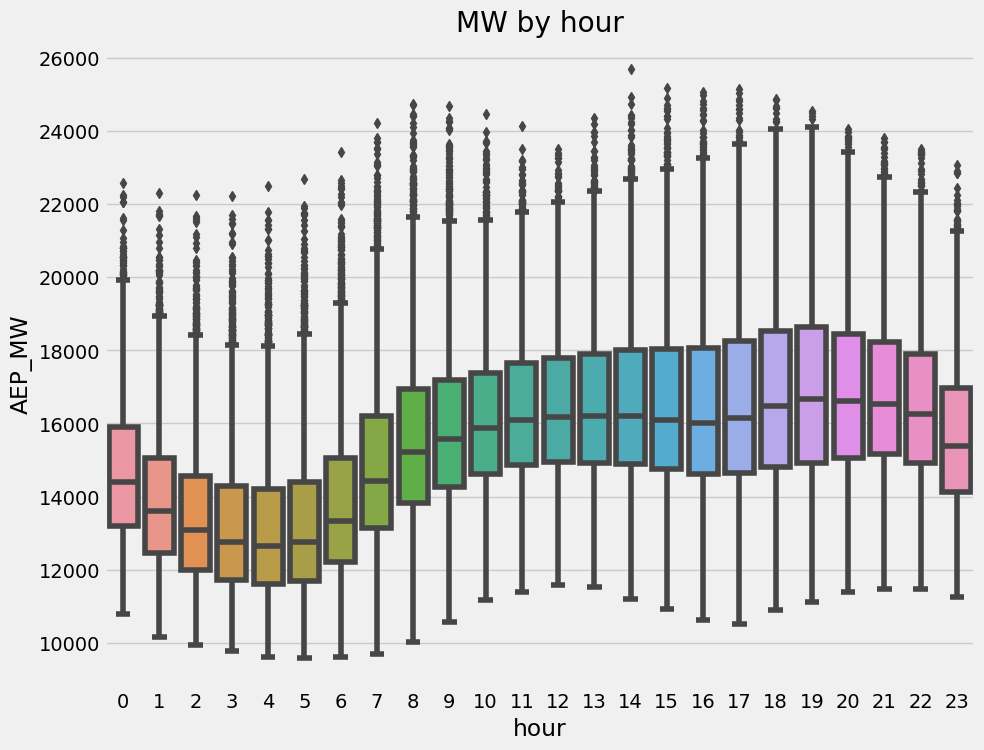

In [12]:
#visualize feature/target relationship
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='hour', y='AEP_MW')
ax.set_title('MW by hour')
plt.show()

In [13]:
train=create_features(train)
test=create_features(test)


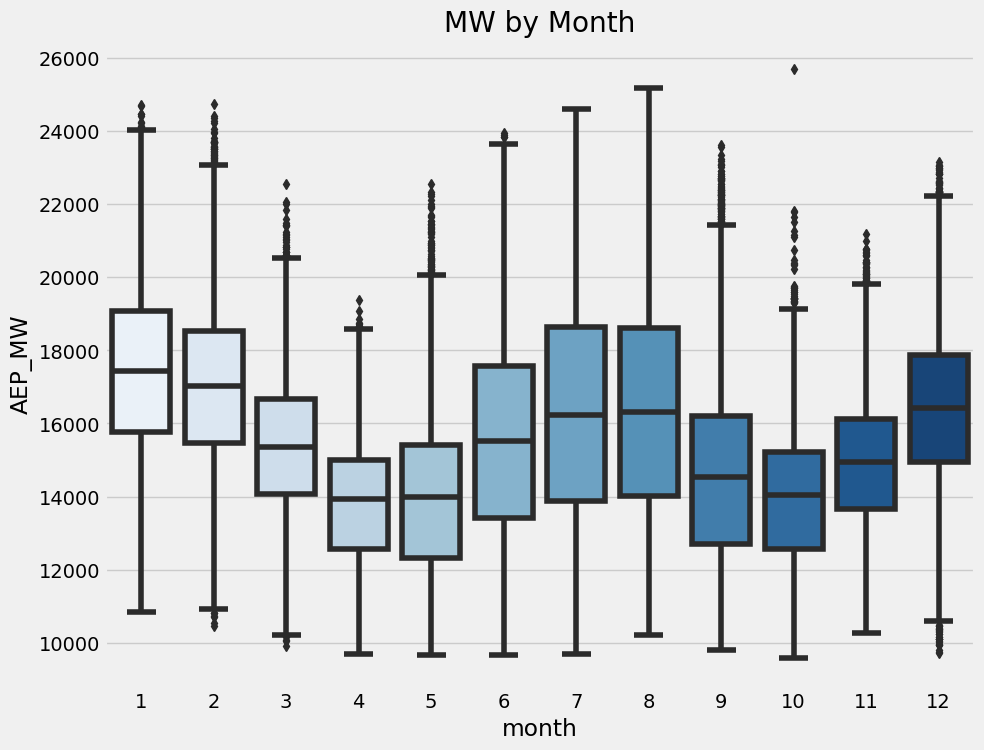

In [14]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='month', y='AEP_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

In [15]:
df.columns

Index(['AEP_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear'], dtype='object')

In [16]:
FEATURES=['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET='AEP_MW'

In [17]:
X_train=train[FEATURES]
y_train=train[TARGET]

X_test=test[FEATURES]
y_test=test[TARGET]

In [18]:
#creating the model
reg=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50, learning_rate=0.001)
reg.fit(X_train, y_train,
       eval_set=[(X_train, y_train), (X_test, y_test)],
       verbose=True)

[0]	validation_0-rmse:2571.77747	validation_1-rmse:2683.16754
[1]	validation_0-rmse:2570.14130	validation_1-rmse:2681.67047
[2]	validation_0-rmse:2568.50728	validation_1-rmse:2680.17556
[3]	validation_0-rmse:2566.87549	validation_1-rmse:2678.68303
[4]	validation_0-rmse:2565.24598	validation_1-rmse:2677.17788
[5]	validation_0-rmse:2563.61867	validation_1-rmse:2675.68995
[6]	validation_0-rmse:2561.99351	validation_1-rmse:2674.18935
[7]	validation_0-rmse:2560.37056	validation_1-rmse:2672.70590
[8]	validation_0-rmse:2558.74990	validation_1-rmse:2671.20963
[9]	validation_0-rmse:2557.13403	validation_1-rmse:2669.73380
[10]	validation_0-rmse:2555.51767	validation_1-rmse:2668.24200
[11]	validation_0-rmse:2553.90715	validation_1-rmse:2666.76898
[12]	validation_0-rmse:2552.29435	validation_1-rmse:2665.28368
[13]	validation_0-rmse:2550.68466	validation_1-rmse:2663.81388
[14]	validation_0-rmse:2549.07974	validation_1-rmse:2662.33432
[15]	validation_0-rmse:2547.47447	validation_1-rmse:2660.86914
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

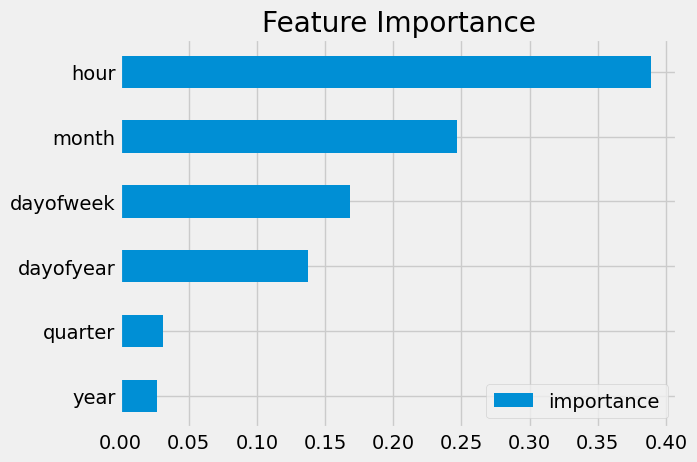

In [19]:
fi=pd.DataFrame(reg.feature_importances_,
            index=reg.feature_names_in_,
            columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [20]:
#forecast on test
test['prediction']=reg.predict(X_test)

In [21]:
df

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,1,2018,1
2018-01-01 21:00:00,20999.0,21,0,1,1,2018,1
2018-01-01 22:00:00,20820.0,22,0,1,1,2018,1


In [22]:
df=df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

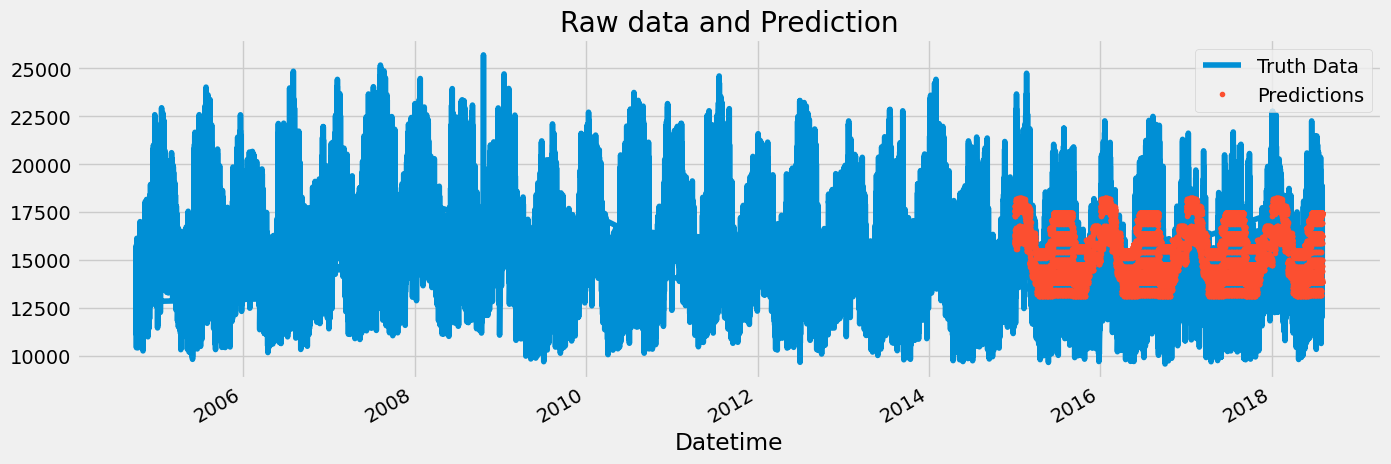

In [23]:
ax=df[['AEP_MW']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw data and Prediction')
plt.show()

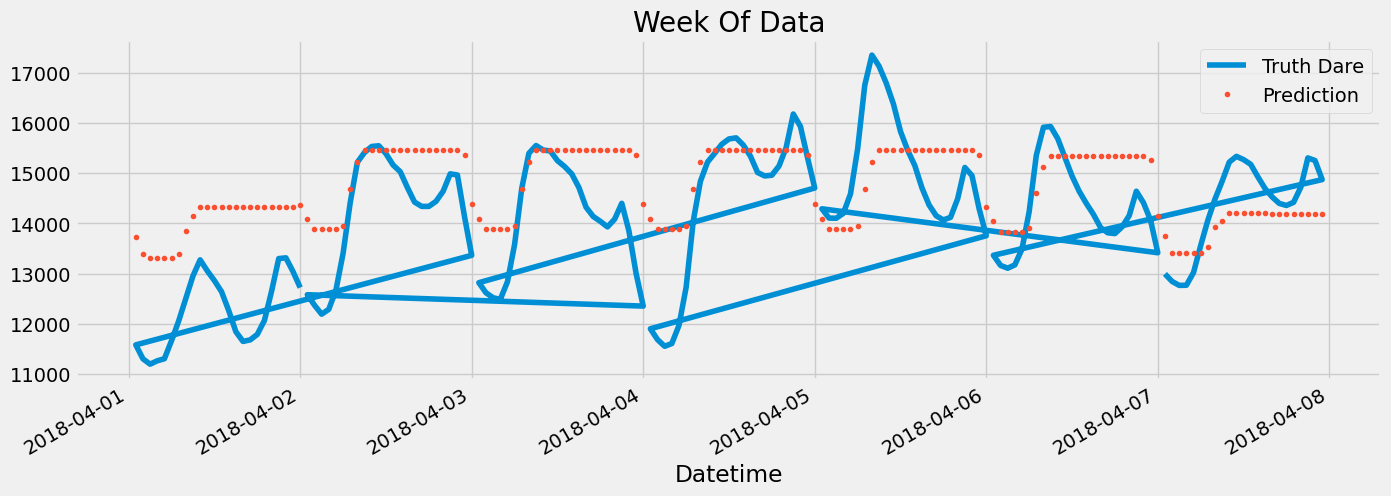

In [25]:
ax=df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['AEP_MW'].plot(figsize=(15,5), title='Week Of Data')
df.loc[(df.index > '04-01-2018' )& (df.index < '04-08-2018')]['prediction'].plot(style='.')
plt.legend(['Truth Dare', 'Prediction'])
plt.show()


In [29]:
score=np.sqrt(mean_squared_error(test['AEP_MW'], test['prediction']))
print(f'The root mean squared error on the test set is : {score:0.2f}')

The root mean squared error on the test set is : 1911.17


To get the average error for each day


In [33]:
test['error']=np.abs(test[TARGET]- test['prediction'])
test['date']=test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(5)

date
2015-02-19    5413.341512
2015-02-20    5269.139038
2015-12-25    4974.974772
2018-01-06    4786.471436
2015-12-24    4571.338135
Name: error, dtype: float64

In [34]:
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(5)

date
2018-08-03    199.906250
2016-03-04    364.277913
2017-02-03    365.161906
2017-12-17    392.280965
2016-02-26    396.142456
Name: error, dtype: float64